In [243]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dl = DataLib("SignalData")

In [2]:
def standardize_columns(df):
    stand_df = pd.DataFrame()
    for column in df.columns:
        mean = np.mean(df[column])
        std = np.std(df[column])
        stand_df[column] = (df[column]-mean)/std
    return stand_df

## Question 1

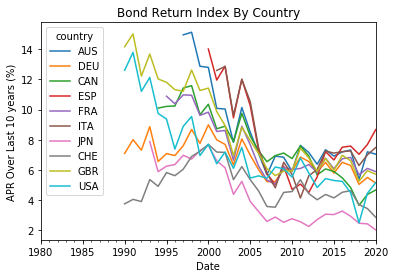

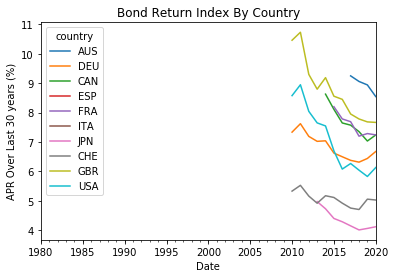

In [3]:
BondReturnIndex = dl.pull('BondRetIdx/LocalFX')
BondReturnIndexAnnual = BondReturnIndex.resample('1Y').last()
BondReturnIndexChange = BondReturnIndexAnnual.pct_change()

BondReturn10Years = 100*BondReturnIndexChange.rolling(10, min_periods=10).apply(lambda x: ((1+x).prod()**(1/10))-1, 
                                                                              raw=True)
BondReturn30Years = 100*BondReturnIndexChange.rolling(30, min_periods=30).apply(lambda x: ((1+x).prod()**(1/30))-1, 
                                                                              raw=True)

BondReturn10Years.plot()
plt.xlabel('Date')
plt.ylabel('APR Over Last 10 years (%)')
plt.title('Bond Return Index By Country')
plt.show()

BondReturn30Years.plot()
plt.xlabel('Date')
plt.ylabel('APR Over Last 30 years (%)')
plt.title('Bond Return Index By Country')
plt.show()

Spain has given the best returns in the last 10 years, and Ausralia has given the best returns in the past 30 years.

## Question 2

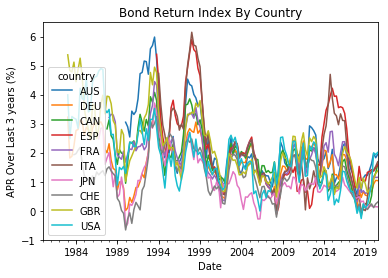

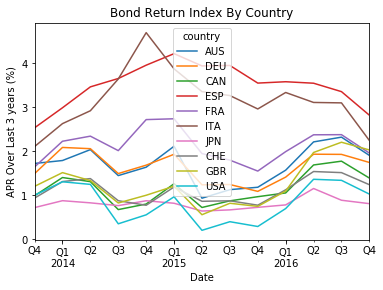

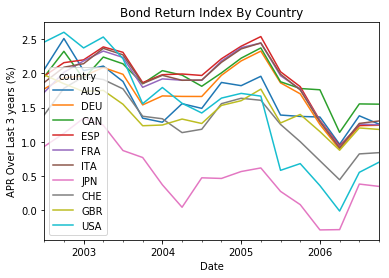

In [4]:
BondReturnIndex = dl.pull('BondRetIdx/LocalFX')
BondReturnIndexAnnual = BondReturnIndex.resample('1Q').last()
BondReturnIndexChange = BondReturnIndexAnnual.pct_change()

BondReturn3Years = 100*BondReturnIndexChange.rolling(12, min_periods=12).apply(lambda x: ((1+x).prod()**(1/12))-1, 
                                                                              raw=True)

BondReturn3Years.plot()
plt.xlabel('Date')
plt.ylabel('APR Over Last 3 years (%)')
plt.title('Bond Return Index By Country')
plt.show()

BondReturn3Years.loc[pd.Period('2013Q4'):pd.Period('2016Q4')].plot()
plt.xlabel('Date')
plt.ylabel('APR Over Last 3 years (%)')
plt.title('Bond Return Index By Country')
plt.show()

BondReturn3Years.loc[pd.Period('2002Q3'):pd.Period('2006Q4')].plot()
plt.xlabel('Date')
plt.ylabel('APR Over Last 3 years (%)')
plt.title('Bond Return Index By Country')
plt.show()

### 2014 - 2017: Italy and Spain outperform the market

These were the years of the economic recovery after the European Credit Crisis. Lower Interest Rates were targeted by Central Banks to stimulate the economy, which raised bond returns.

### 2002 - 2006: Japan underperforms the market

The overall period of 1990-2010 is know as the Japan Lost 20 Years, with growth stagnation. From 2001 to 2006, Japan had zero Interest Rates to fight deflation. After they were kept at zero and could not be lowered even more, returns could not increase and were very low.

## Question 3

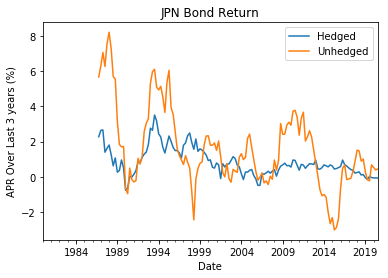

In [5]:
country = 'JPN'
exposure_fee = 0.2

BondReturnIndex = dl.pull('BondRetIdx/LocalFX')
fxVsUSD = dl.pull('fxVsUSD')

HedgedBondReturnIndexQuarterly = BondReturnIndex.resample('1Q').last()
UnhedgedBondReturnIndexQuarterly = BondReturnIndex.resample('1Q').last() / fxVsUSD.resample('1Q').last()


HedgedBondReturnIndexChange = HedgedBondReturnIndexQuarterly.pct_change()
UnhedgedBondReturnIndexChange = UnhedgedBondReturnIndexQuarterly.pct_change()

HedgedBondReturn3Years = 100*HedgedBondReturnIndexChange.rolling(12, min_periods=12).apply(lambda x: ((1+x).prod()**(1/12))-1, 
                                                                              raw=True) - exposure_fee
UnhedgedBondReturn3Years = 100*UnhedgedBondReturnIndexChange.rolling(12, min_periods=12).apply(lambda x: ((1+x).prod()**(1/12))-1, 
                                                                              raw=True)

HedgedBondReturn3Years[country].plot()
UnhedgedBondReturn3Years[country].plot()
plt.xlabel('Date')
plt.ylabel('APR Over Last 3 years (%)')
plt.title('{} Bond Return'.format(country))
plt.legend(['Hedged', 'Unhedged'])
plt.show()

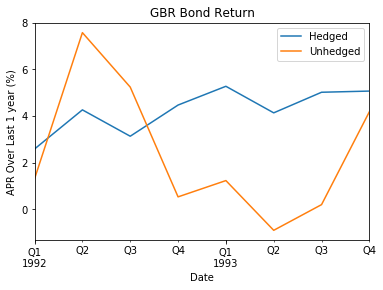

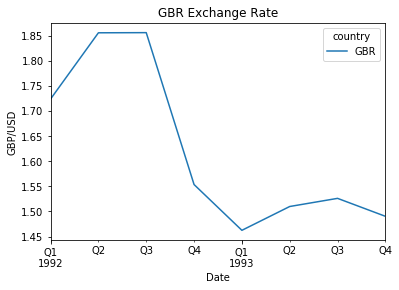

In [6]:
country = 'GBR'
exposure_fee = 0.2

BondReturnIndex = dl.pull('BondRetIdx/LocalFX')
fxVsUSD = dl.pull('fxVsUSD')

HedgedBondReturnIndexQuarterly = BondReturnIndex.resample('1Q').last()
UnhedgedBondReturnIndexQuarterly = BondReturnIndex.resample('1Q').last() * fxVsUSD.resample('1Q').last()


HedgedBondReturnIndexChange = HedgedBondReturnIndexQuarterly.pct_change()
UnhedgedBondReturnIndexChange = UnhedgedBondReturnIndexQuarterly.pct_change()

HedgedBondReturn1Year = 100*HedgedBondReturnIndexChange.rolling(4, min_periods=4).apply(lambda x: ((1+x).prod()**(1/4))-1, 
                                                                              raw=True) - exposure_fee
UnhedgedBondReturn1Year = 100*UnhedgedBondReturnIndexChange.rolling(4, min_periods=4).apply(lambda x: ((1+x).prod()**(1/4))-1, 
                                                                              raw=True)

HedgedBondReturn1Year[country].loc[pd.Period('1992Q1'):pd.Period('1993Q4')].plot()
UnhedgedBondReturn1Year[country].loc[pd.Period('1992Q1'):pd.Period('1993Q4')].plot()
plt.xlabel('Date')
plt.ylabel('APR Over Last 1 year (%)')
plt.title('{} Bond Return'.format(country))
plt.legend(['Hedged', 'Unhedged'])
plt.show()

fxVsUSD[[country]].resample('1Q').last().loc[pd.Period('1992Q1'):pd.Period('1993Q4')].plot()
plt.ylabel('GBP/USD')
plt.xlabel('Date')
plt.title('{} Exchange Rate'.format(country))
plt.show()

The British Hedged and Unhedged Returns are so different around the end of 1992 because of the Black Wednesday, in which the value of the British Pound fell drastically.

In [7]:
fxToUSD = fxVsUSD.copy()
inverted_countries = ['JPN', 'CHE', 'CAN', 'AUS', 'FRA', 'ITA', 'ESP', 'DEU']

for country in inverted_countries:
    fxToUSD[country] = 1/fxVsUSD[country]

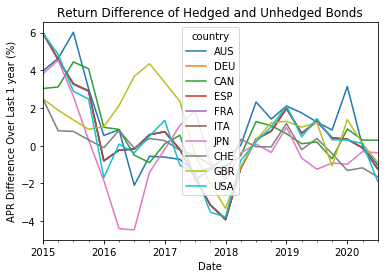

country       AUS       DEU       CAN       ESP       FRA       ITA       JPN  \
date                                                                            
2019Q3   1.257554  1.274138  0.198231  1.289665  1.275659  1.321887 -1.251885   
2019Q4   0.832021  0.407897 -0.694843  0.416550  0.410297  0.423907 -0.918270   
2020Q1   3.140717  0.338600  0.890235  0.339615  0.337827  0.347889 -0.989540   
2020Q2  -0.026672 -0.113156  0.299861 -0.113774 -0.113215 -0.111997 -0.311356   
2020Q3  -1.021175 -1.227269  0.291880 -1.227817 -1.229028 -1.229557 -0.373699   

country       CHE       GBR       USA  
date                                   
2019Q3   0.384327  1.223268  1.441734  
2019Q4  -0.421316 -1.068751  0.315121  
2020Q1  -1.315211  1.386225  0.299091  
2020Q2  -1.173200  0.108734  0.114396  
2020Q3  -1.652664 -0.882437 -1.887860

In [8]:
exposure_fee = 0.2

BondReturnIndex = dl.pull('BondRetIdx/LocalFX')

HedgedBondReturnIndexQuarterly = BondReturnIndex.resample('1Q').last()
UnhedgedBondReturnIndexQuarterly = BondReturnIndex.resample('1Q').last() * fxToUSD.resample('1Q').last()


HedgedBondReturnIndexChange = HedgedBondReturnIndexQuarterly.pct_change()
UnhedgedBondReturnIndexChange = UnhedgedBondReturnIndexQuarterly.pct_change()

HedgedBondReturn1Year = 100*HedgedBondReturnIndexChange.rolling(4, min_periods=4).apply(lambda x: ((1+x).prod()**(1/4))-1, 
                                                                              raw=True) - exposure_fee
UnhedgedBondReturn1Year = 100*UnhedgedBondReturnIndexChange.rolling(4, min_periods=4).apply(lambda x: ((1+x).prod()**(1/4))-1, 
                                                                              raw=True)
HedgedMinusUnhedged1Year = HedgedBondReturn1Year - UnhedgedBondReturn1Year

HedgedMinusUnhedged1Year.loc[pd.Period('2015Q1'):].plot()
plt.xlabel('Date')
plt.ylabel('APR Difference Over Last 1 year (%)')
plt.title('Return Difference of Hedged and Unhedged Bonds')
plt.show()

HedgedMinusUnhedged1Year.tail()

As of 2020Q3, it was better to Hedge for one year in Germany and Canada, and worse in all other countries.

## Question 4

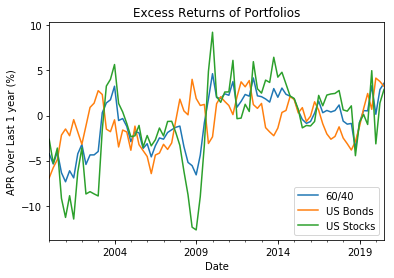

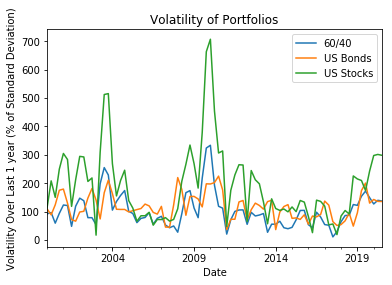

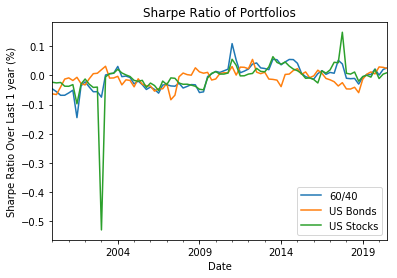

In [9]:
BondReturnIndexUSA = dl.pull('BondRetIdx/LocalFX')[['USA']]
EquityReturnIndexUSA = dl.pull('EquityPrices')[['USA']]
InterestRatesUSA = dl.pull('ShortRates')[['USA']]

BondReturnIndexUSAQuarterly = BondReturnIndexUSA.resample('1Q').last()
EquityReturnIndexUSAQuarterly = EquityReturnIndexUSA.resample('1Q').last()
InterestRatesUSAQuarterly = InterestRatesUSA.resample('1Q').last()

BondReturnIndexUSAChange = BondReturnIndexUSAQuarterly.pct_change()
EquityReturnIndexUSAChange = EquityReturnIndexUSAQuarterly.pct_change()

SixtyFortyReturnChange = 0.6 * EquityReturnIndexUSAChange + 0.4 * BondReturnIndexUSAChange

Portfolios = pd.DataFrame()

Portfolios['60/40'] = SixtyFortyReturnChange['USA'].copy()
Portfolios['US Bonds'] = BondReturnIndexUSAChange['USA'].copy()
Portfolios['US Stocks'] = EquityReturnIndexUSAChange['USA'].copy()

Portfolios1YearReturn = 100*Portfolios.rolling(4, min_periods=4).apply(lambda x: ((1+x).prod()**(1/4))-1, 
                                                                              raw=True)
Portfolios1YearExcess = pd.DataFrame()

for column in Portfolios1YearReturn.columns:
    Portfolios1YearExcess[column] = Portfolios1YearReturn[column] - InterestRatesUSAQuarterly['USA']

Portfolios1YearExcess.loc[pd.Period('2000Q1'):].plot()
plt.ylabel('APR Over Last 1 year (%)')
plt.xlabel('Date')
plt.title('Excess Returns of Portfolios')
plt.show()

Portfolios1YearVolatility = 100*Portfolios1YearExcess.rolling(4, min_periods=4).apply(lambda x: np.std(x), 
                                                                              raw=True)

Portfolios1YearVolatility.loc[pd.Period('2000Q1'):].plot()
plt.ylabel('Volatility Over Last 1 year (% of Standard Deviation)')
plt.xlabel('Date')
plt.title('Volatility of Portfolios')
plt.show()

Portfolios1YearSharpe = Portfolios1YearExcess / Portfolios1YearVolatility

Portfolios1YearSharpe.loc[pd.Period('2000Q1'):][['60/40', 'US Bonds', 'US Stocks']].plot()
plt.ylabel('Sharpe Ratio Over Last 1 year (%)')
plt.xlabel('Date')
plt.title('Sharpe Ratio of Portfolios')
plt.show()

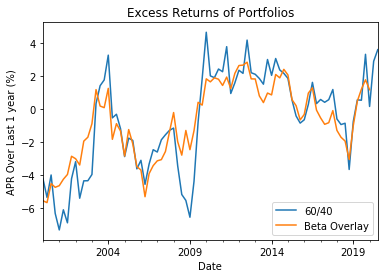

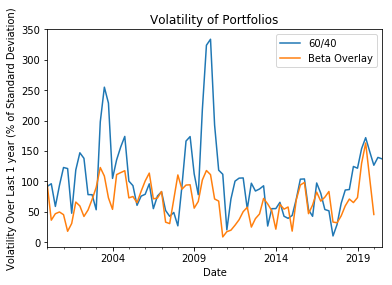

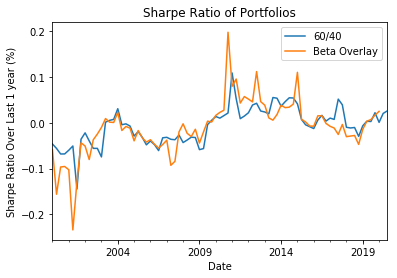

In [10]:
BondReturnIndex = dl.pull('BondRetIdx/LocalFX')
countries = list(BondReturnIndex.columns)

RGDP = dl.pull('GDP/Real')
RGDP = RGDP[:-1]

BondReturnIndexQuarters = BondReturnIndex.resample('1Q').last()
RGDPQuarters = RGDP.resample('1Q').last()

BondReturnIndexChange['Weighted by GDP'] = sum([RGDP[country]*BondReturnIndexChange[country]                                                  for country in countries])
BondReturnIndexChange['Weighted by GDP'] /= sum([RGDP[country] for country in countries])

Portfolios['World Bonds'] = BondReturnIndexChange['Weighted by GDP'].copy()

Portfolios['Beta Overlay'] = 0.5 * Portfolios['60/40'] + 0.5 * Portfolios['World Bonds']

Portfolios = Portfolios[['60/40', 'Beta Overlay']]

Portfolios1YearReturn = 100*Portfolios.rolling(4, min_periods=4).apply(lambda x: ((1+x).prod()**(1/4))-1, 
                                                                              raw=True)


Portfolios1YearExcess = pd.DataFrame()

for column in Portfolios1YearReturn.columns:
    Portfolios1YearExcess[column] = Portfolios1YearReturn[column] - InterestRatesUSAQuarterly['USA']

Portfolios1YearExcess.loc[pd.Period('2000Q1'):].plot()
plt.ylabel('APR Over Last 1 year (%)')
plt.xlabel('Date')
plt.title('Excess Returns of Portfolios')
plt.show()

Portfolios1YearVolatility = 100*Portfolios1YearExcess.rolling(4, min_periods=4).apply(lambda x: np.std(x), 
                                                                              raw=True)

Portfolios1YearVolatility.loc[pd.Period('2000Q1'):].plot()
plt.ylabel('Volatility Over Last 1 year (% of Standard Deviation)')
plt.xlabel('Date')
plt.title('Volatility of Portfolios')
plt.show()

Portfolios1YearSharpe = Portfolios1YearExcess / Portfolios1YearVolatility

Portfolios1YearSharpe.loc[pd.Period('2000Q1'):].plot()
plt.ylabel('Sharpe Ratio Over Last 1 year (%)')
plt.xlabel('Date')
plt.title('Sharpe Ratio of Portfolios')
plt.show()

The Beta Overlay Strategy does not seem to improve the total return, but does seem to reduce volatility. It is unclear if improves of worsens the Sharpe Ratio.

## Question 5

In [187]:
fig = plt.figure(figsize=(12,8))

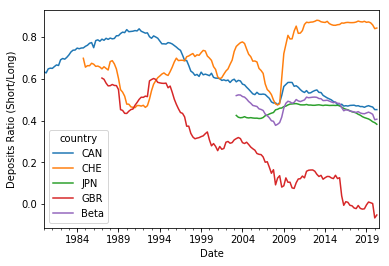

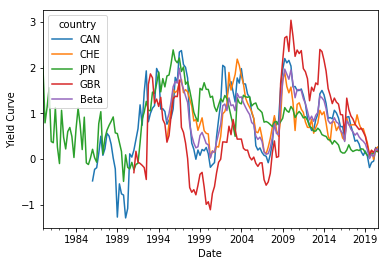

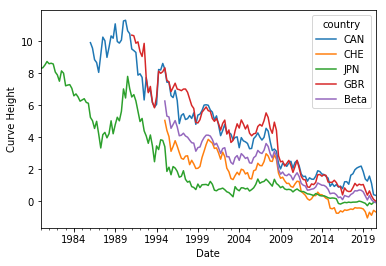

In [188]:
train_countries = ['CAN', 'CHE', 'JPN', 'GBR']

test_countries = ['AUS']

M1 = dl.pull("M1/inUSD")
M2 = dl.pull("M2/inUSD")
M3 = dl.pull("M3/inUSD")

M1Quarterly = M1.resample('1Q').last()
M2Quarterly = M2.resample('1Q').last()
M3Quarterly = M3.resample('1Q').last()

ShortRates = dl.pull("ShortRates")
LongRates = dl.pull("LongRates")

ShortRatesQuarterly = ShortRates.resample('1Q').last()
LongRatesQuarterly = LongRates.resample('1Q').last()

ShortDepositsTrain = (M2Quarterly-M1Quarterly)[train_countries].copy()
TimedDepositsTrain = (M3Quarterly-M1Quarterly)[train_countries].copy()
ShortRatesTrain = ShortRatesQuarterly[train_countries].copy()
LongRatesTrain = LongRatesQuarterly[train_countries].copy()

DepositsRatioTrain = ShortDepositsTrain / TimedDepositsTrain
YieldCurveTrain = LongRatesTrain - ShortRatesTrain
CurveHeightTrain = (LongRatesTrain + ShortRatesTrain) / 2

DepositsRatioTrain['Beta'] = sum([DepositsRatioTrain[country] for country in train_countries])/len(train_countries)
YieldCurveTrain['Beta'] = sum([YieldCurveTrain[country] for country in train_countries])/len(train_countries)
CurveHeightTrain['Beta'] = sum([CurveHeightTrain[country] for country in train_countries])/len(train_countries)

DepositsRatioTrain.plot()
plt.ylabel('Deposits Ratio (Short/Long)')
plt.xlabel('Date')
plt.show()

YieldCurveTrain.plot()
plt.ylabel('Yield Curve')
plt.xlabel('Date')
plt.show()

CurveHeightTrain.plot()
plt.ylabel('Curve Height')
plt.xlabel('Date')
plt.show()

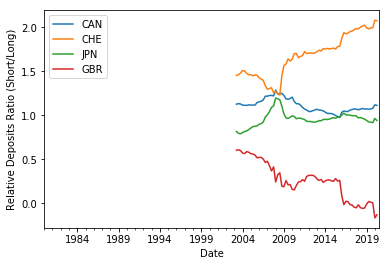

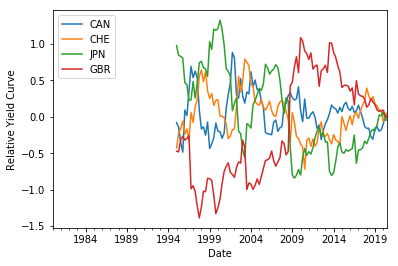

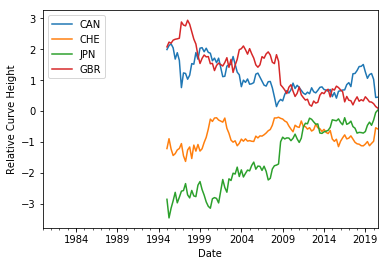

In [189]:
DepositsRatioTrainRelative = pd.DataFrame()
YieldCurveTrainRelative = pd.DataFrame()
CurveHeightTrainRelative = pd.DataFrame()

for country in train_countries:    
    DepositsRatioTrainRelative[country] = DepositsRatioTrain[country] / DepositsRatioTrain['Beta']
    YieldCurveTrainRelative[country] = YieldCurveTrain[country] - YieldCurveTrain['Beta']
    CurveHeightTrainRelative[country] = CurveHeightTrain[country] - CurveHeightTrain['Beta']

DepositsRatioTrainRelative.plot()
plt.ylabel('Relative Deposits Ratio (Short/Long)')
plt.xlabel('Date')
plt.show()

YieldCurveTrainRelative.plot()
plt.ylabel('Relative Yield Curve')
plt.xlabel('Date')
plt.show()

CurveHeightTrainRelative.plot()
plt.ylabel('Relative Curve Height')
plt.xlabel('Date')
plt.show()

/Users/rogerio/.local/share/virtualenvs/Intership2020-c3F2SfGl/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


train score is: 0.2615705875781268


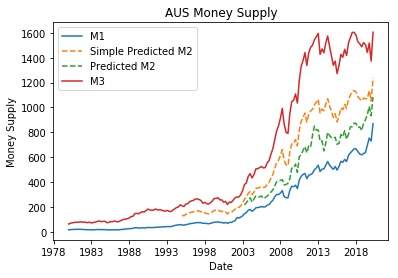

In [191]:
data = pd.DataFrame(columns=['Relative Deposits Ratio', 'Relative Yield Curve', 'Relative Curve Height'])

for country in train_countries:
    country_data = pd.DataFrame()
    country_data['Relative Yield Curve'] = YieldCurveTrainRelative[country]
    country_data['Relative Curve Height'] = CurveHeightTrainRelative[country]
    country_data['Relative Deposits Ratio'] = DepositsRatioTrainRelative[country]
    country_data = country_data.dropna()
    
    data = data.append(country_data)

X_train = data[['Relative Yield Curve', 'Relative Curve Height']]
y_train = data['Relative Deposits Ratio']

from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

data['Predicted Relative Deposits Ratio'] = lm.predict(X_train)
print('train score is:', lm.score(X_train,y_train))

TimedDepositsTest = (M3Quarterly-M1Quarterly)[test_countries].copy()
ShortRatesTest = ShortRatesQuarterly[test_countries].copy()
LongRatesTest = LongRatesQuarterly[test_countries].copy()

YieldCurveTest = LongRatesTest - ShortRatesTest
CurveHeightTest = (LongRatesTest + ShortRatesTest) / 2

YieldCurveTestRelative = pd.DataFrame()
CurveHeightTestRelative = pd.DataFrame()

for country in test_countries:    
    YieldCurveTestRelative[country] = YieldCurveTest[country] - YieldCurveTrain['Beta']
    CurveHeightTestRelative[country] = CurveHeightTest[country] - CurveHeightTrain['Beta']

for country in test_countries:
    
    test_data = pd.DataFrame()

    test_data['Relative Yield Curve'] = YieldCurveTestRelative[country]
    test_data['Relative Curve Height'] = CurveHeightTestRelative[country]
    test_data = test_data.dropna()

    X_test = test_data[['Relative Yield Curve', 'Relative Curve Height']]
    test_data['Predicted Relative Deposits Ratio'] = lm.predict(X_test)

    test_data['Predicted Deposits Ratio'] = test_data['Predicted Relative Deposits Ratio'] * DepositsRatioTrain['Beta']
    
    test_data['Simple Predicted M2'] = M1Quarterly[country] + TimedDepositsTest[country]/2
    test_data['Predicted Short Deposits'] = test_data['Predicted Deposits Ratio'] * TimedDepositsTest[country]
    test_data['Predicted M2'] = M1Quarterly[country] + test_data['Predicted Short Deposits']
    
    plt.plot(M1Quarterly[country].to_timestamp(), label='M1')
    plt.plot(test_data['Simple Predicted M2'].to_timestamp(), label='Simple Predicted M2', ls='--')
    plt.plot(test_data['Predicted M2'].to_timestamp(), label='Predicted M2', ls='--')
    plt.plot(M3Quarterly[country].to_timestamp(), label='M3')
    
    if country != 'AUS':
        plt.plot(M2Quarterly[country].to_timestamp(), label='M2')
    
    plt.ylabel('Money Supply')
    plt.xlabel('Date')
    plt.title('{} Money Supply'.format(country))
    plt.legend()
    
    plt.show()

I'd go with the Simple Predicted $M2$: $M1 + \frac{M3-M1}{2}$

## Question 6

In [199]:
def standardize(x):
    mean = np.mean(x)
    std = np.std(x)
    
    return (x-mean)/std

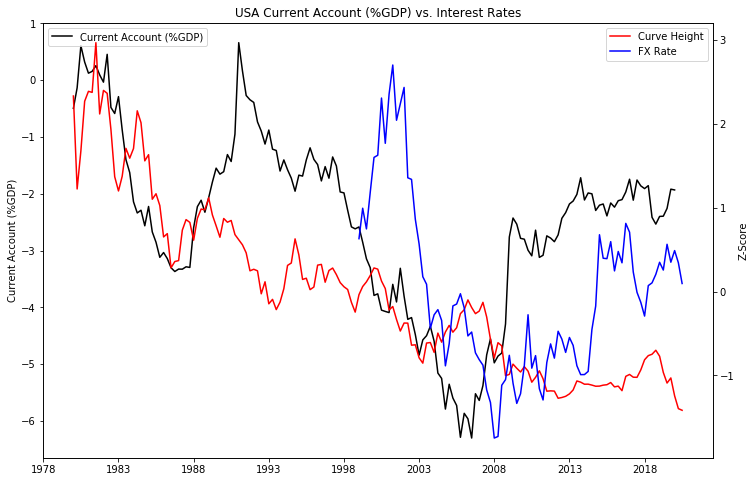

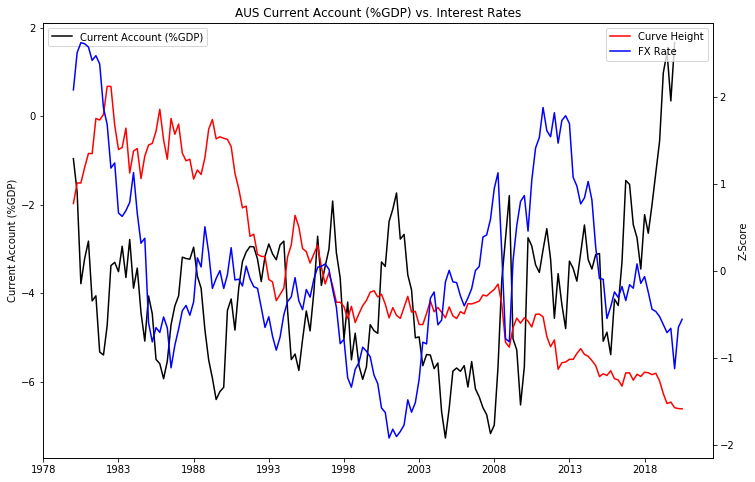

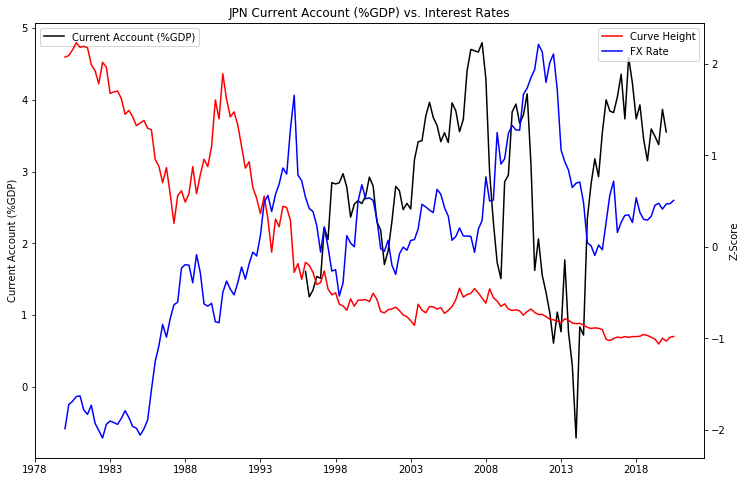

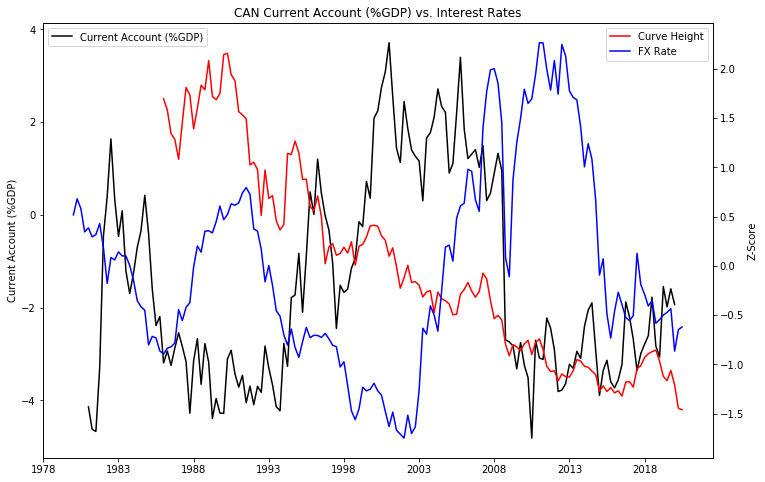

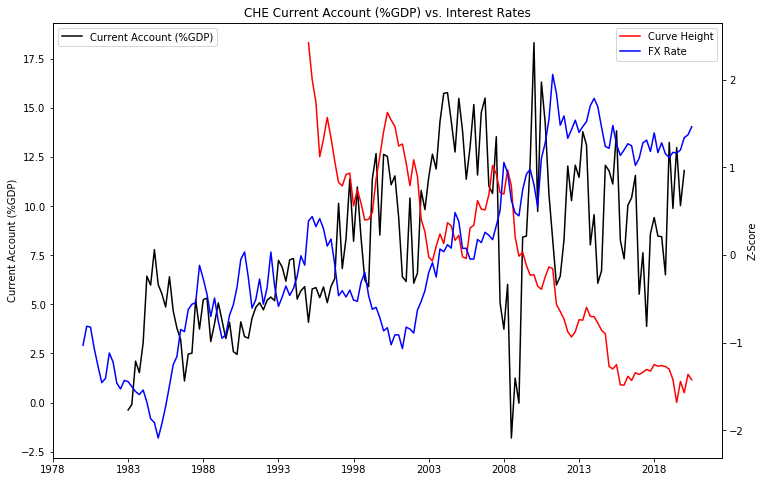

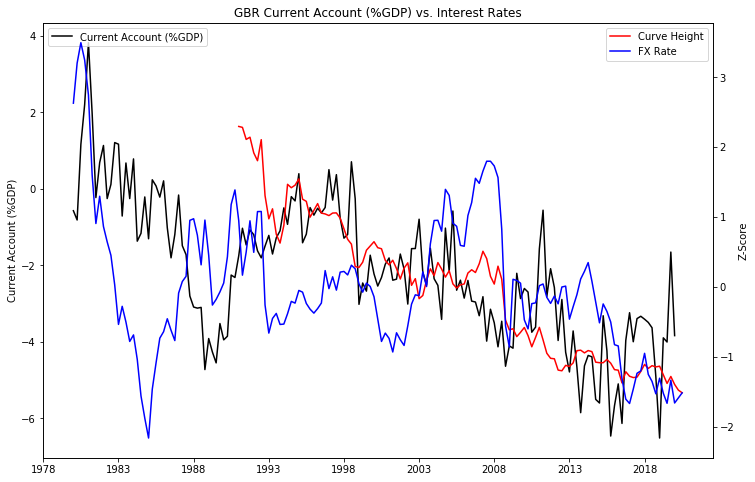

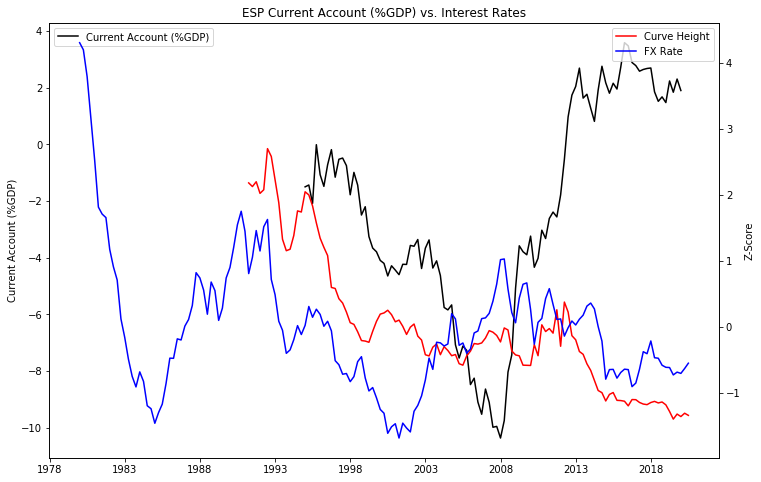

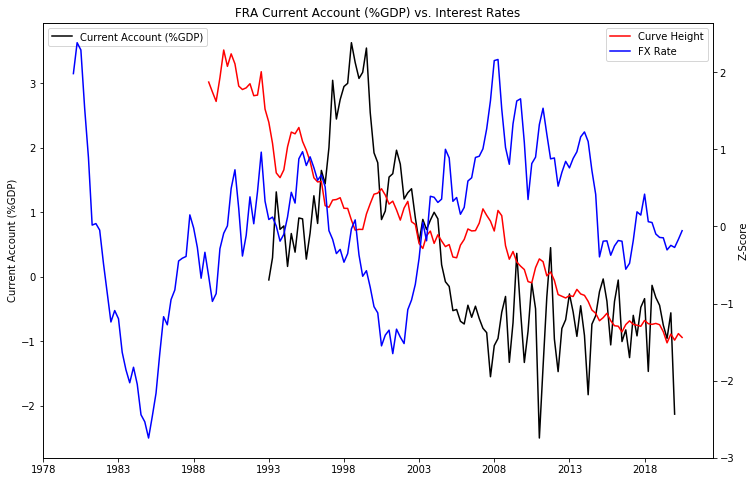

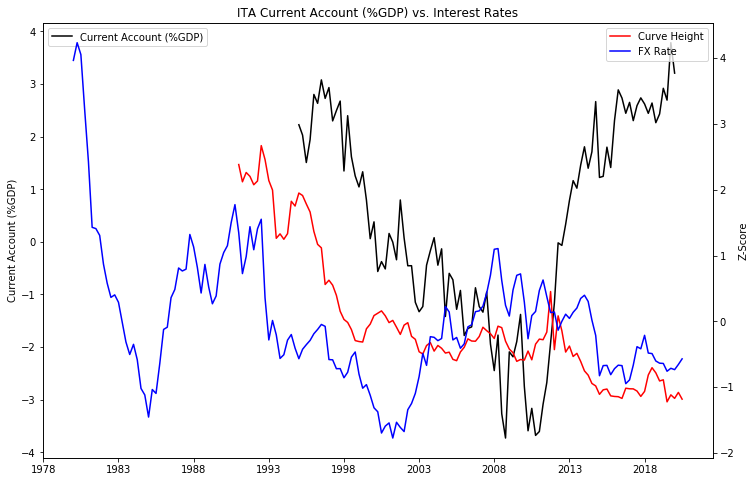

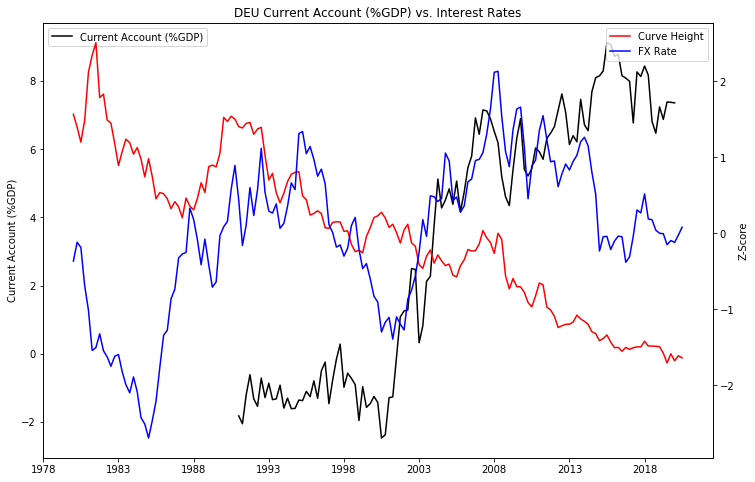

In [203]:
countries = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']

CurrAcctPctGDB = dl.pull('CurrAcctPctGDP').resample('1Q').last()
ShortRates = dl.pull('ShortRates').resample('1Q').last()
LongRates = dl.pull('LongRates').resample('1Q').last()
CurveHeight = (ShortRates + LongRates) / 2
fxVsUSD = 1/dl.pull('fxVsUSD').resample('1Q').last()
fxVsUSD['GBR'] = 1/fxVsUSD['GBR']


for country in countries:
    fig, ax1 = plt.subplots(figsize=(12,8))
    ax2 = ax1.twinx()
    
    ax1_label = 'Current Account (%GDP)'
    ax1.plot(CurrAcctPctGDB[country].to_timestamp(), color='black', label = ax1_label)
    ax1.set_ylabel(ax1_label)
    ax1.legend(loc=2)
    ax2_label = 'Z-Score'
    ax2.plot(standardize(CurveHeight[country]).to_timestamp(), color = 'red', label = 'Curve Height')
    ax2.plot(standardize(fxVsUSD[country]).to_timestamp(), color = 'blue', label = 'FX Rate')
    ax2.set_ylabel(ax2_label)
    ax2.legend()
    plt.title('{} Current Account (%GDP) vs. Interest Rates'.format(country))
    plt.show()

Germany from 1990 to 2003 seemed to be the only example of such behavior

## Question 7

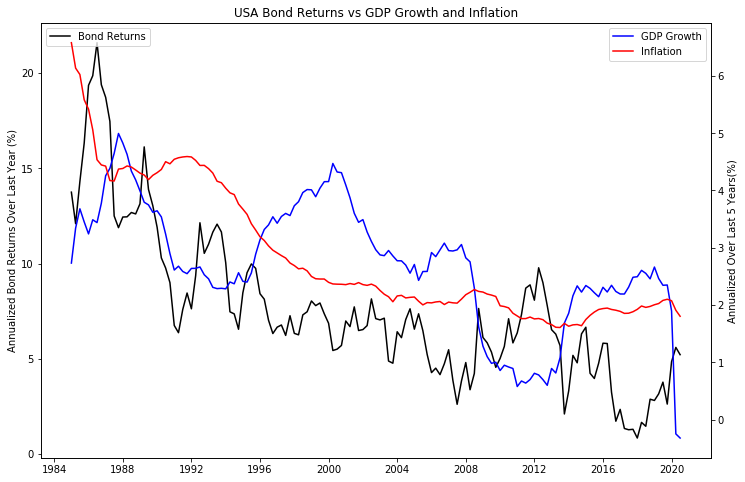

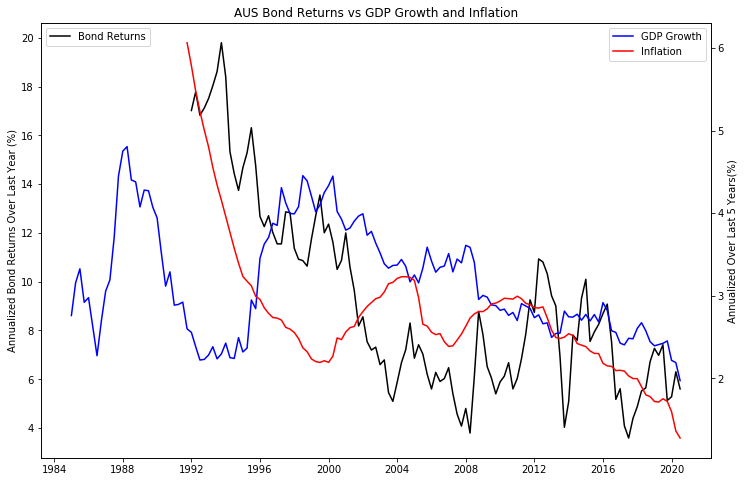

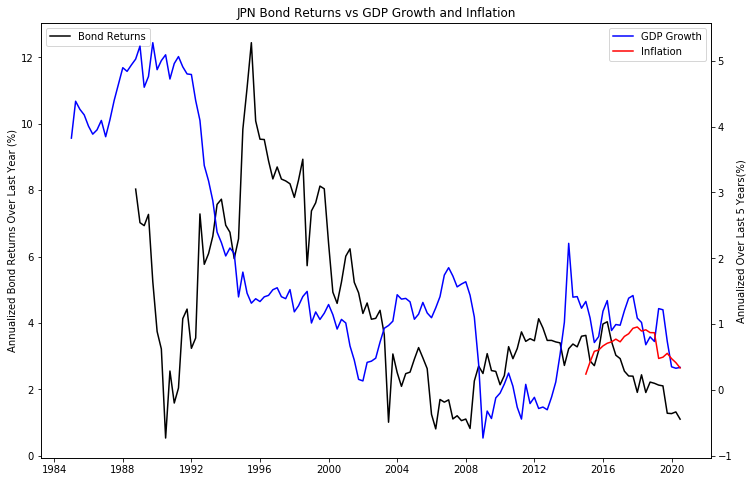

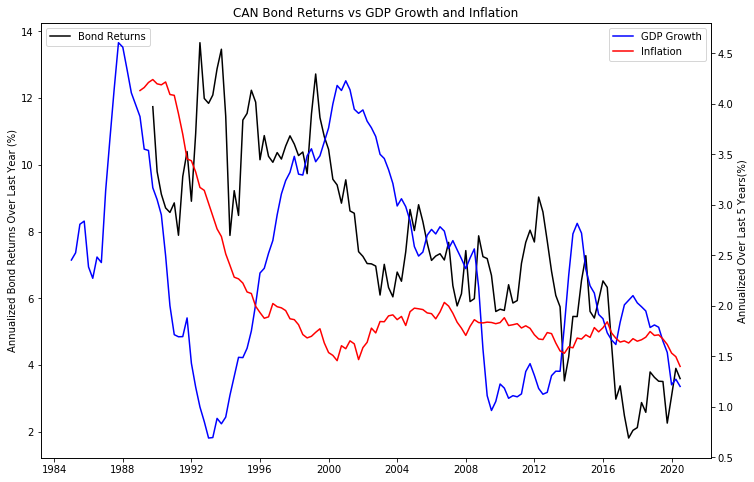

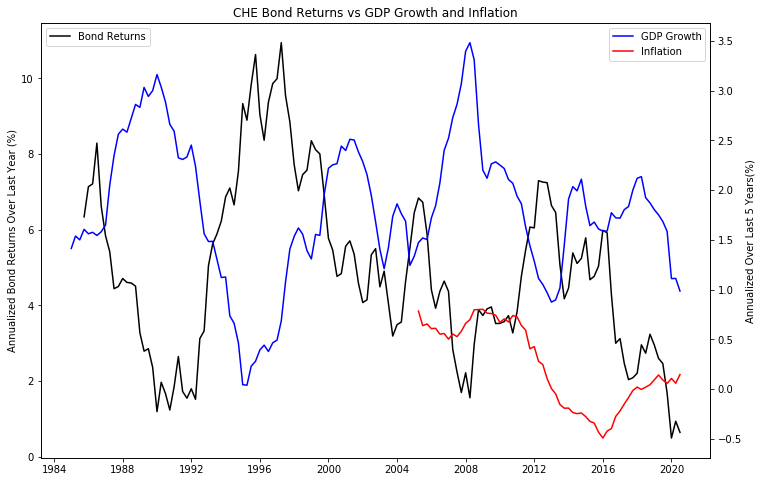

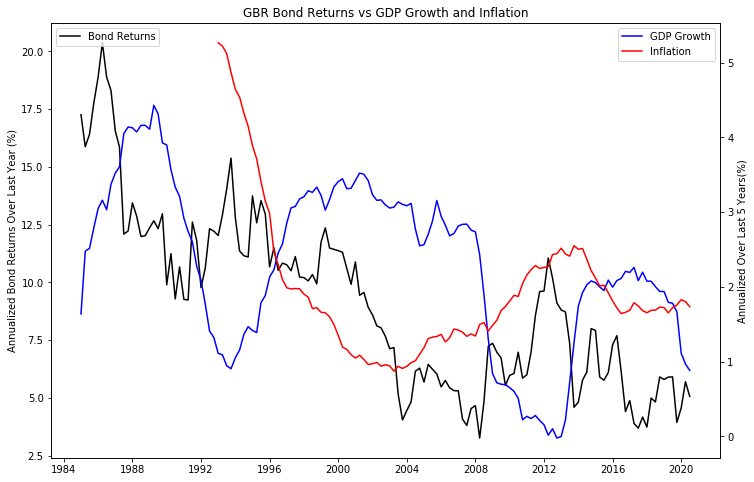

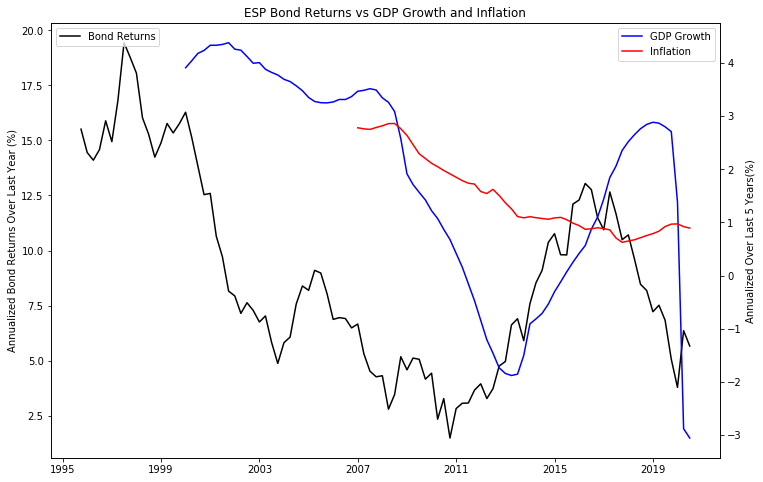

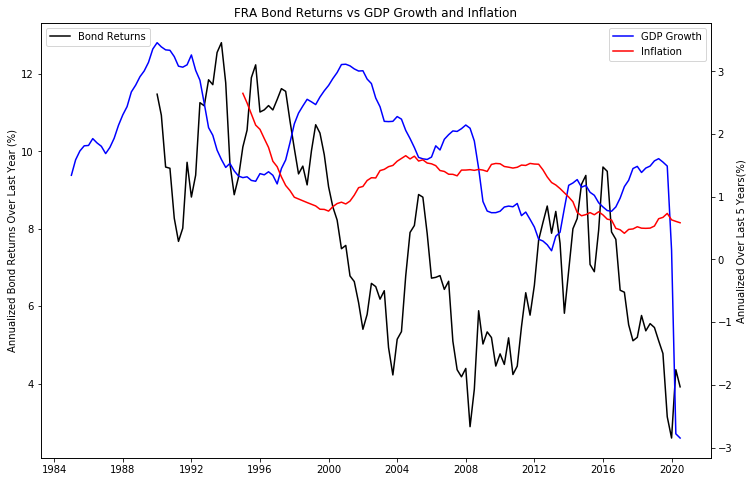

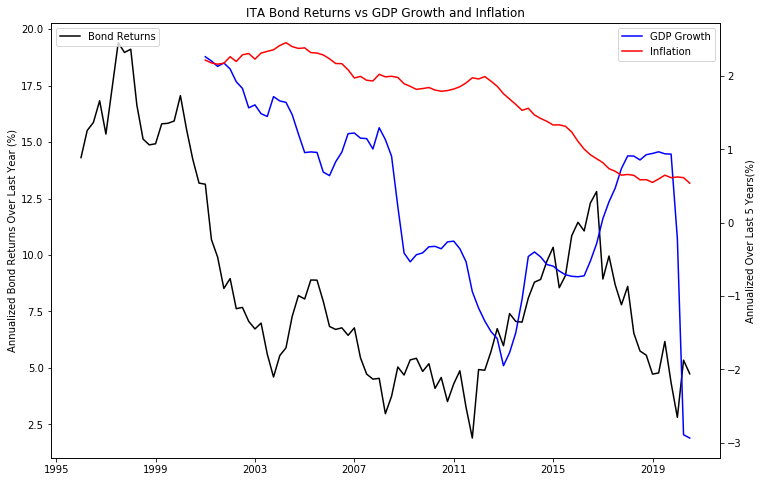

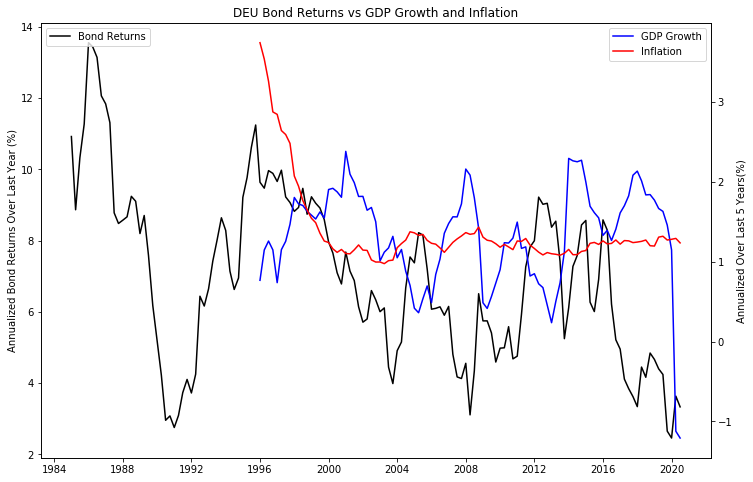

In [228]:
countries = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']

RealGDPQuarterly = dl.pull('GDP/Real').resample('1Q').last()
InflationQuarterly = dl.pull('CoreCPI/SA').resample('1Q').last()
BondReturnsQuarterly = dl.pull('BondRetIdx/LocalFX').resample('1Q').last()

RealGDPGrowth = RealGDPQuarterly.pct_change()
InflationGrowth = InflationQuarterly.pct_change()
BondReturnsGrowth = BondReturnsQuarterly.pct_change()

AnnualizedRealGDPGrowth = 100*RealGDPGrowth.rolling(20, min_periods=20).apply(lambda x: ((1+x).prod()**(1/5))-1, 
                                                                              raw=True)
AnnualizedInflationGrowth = 100*InflationGrowth.rolling(20, min_periods=20).apply(lambda x: ((1+x).prod()**(1/5))-1, 
                                                                              raw=True)
AnnualizedBondReturnsGrowth = 100*BondReturnsGrowth.rolling(20, min_periods=20).apply(lambda x: ((1+x).prod()**(1/5))-1, 
                                                                              raw=True)
for country in countries:
    
    fig, ax1 = plt.subplots(figsize=(12,8))
    ax2 = ax1.twinx()
    
    ax1.plot(AnnualizedBondReturnsGrowth[country].to_timestamp(), color='black', label='Bond Returns')
    ax1.set_ylabel('Annualized Bond Returns Over Last Year (%)')
    ax1.legend(loc=2)
    
    ax2.plot(AnnualizedRealGDPGrowth[country].to_timestamp(), color='blue', label='GDP Growth')
    ax2.plot(AnnualizedInflationGrowth[country].to_timestamp(), color='red', label='Inflation')
    ax2.set_ylabel('Annualized Over Last 5 Years(%)')
    ax2.legend()
    
    plt.xlabel('Date')
    
    plt.title('{} Bond Returns vs GDP Growth and Inflation'.format(country))
    plt.show()

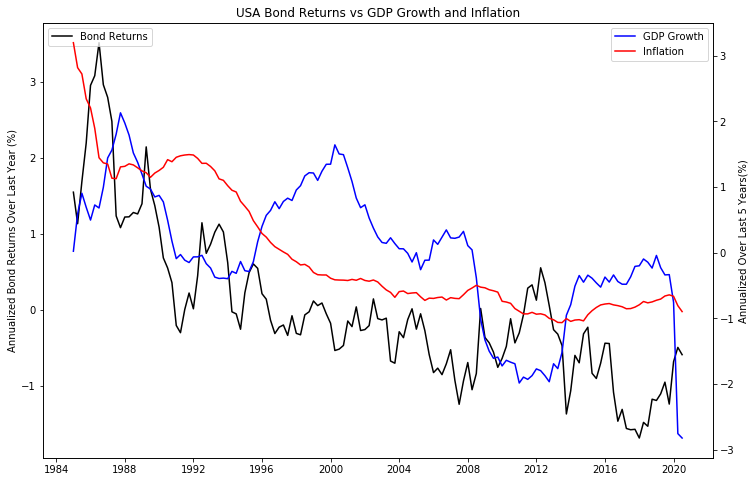

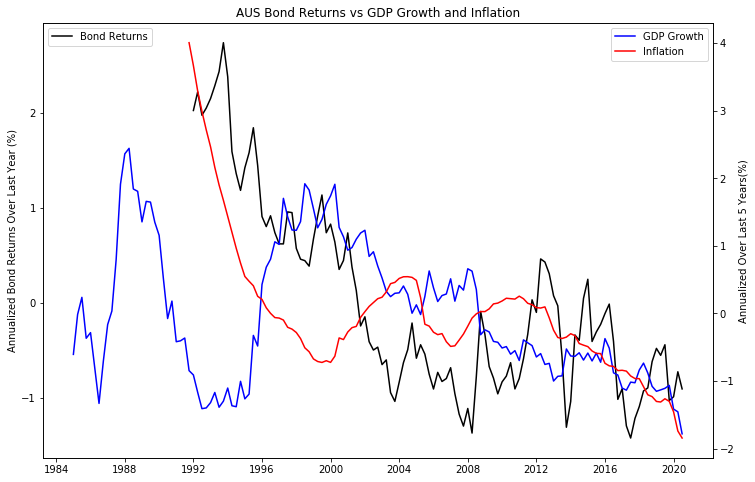

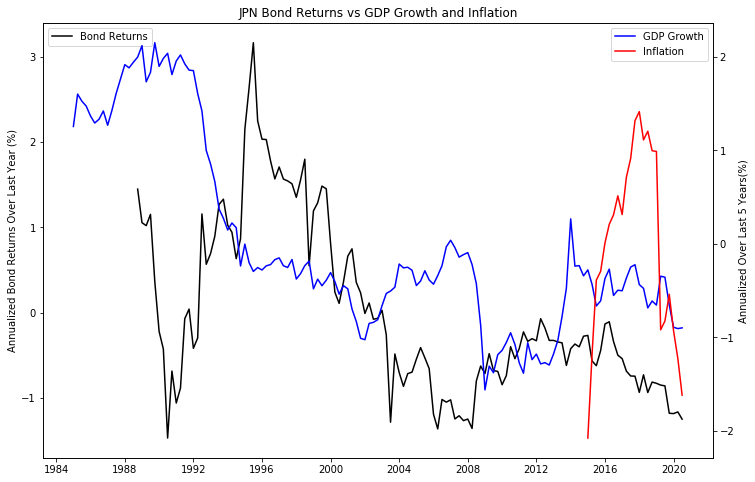

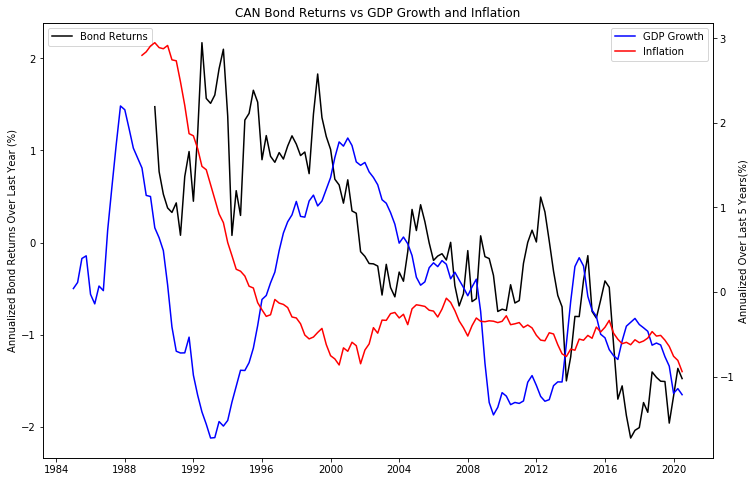

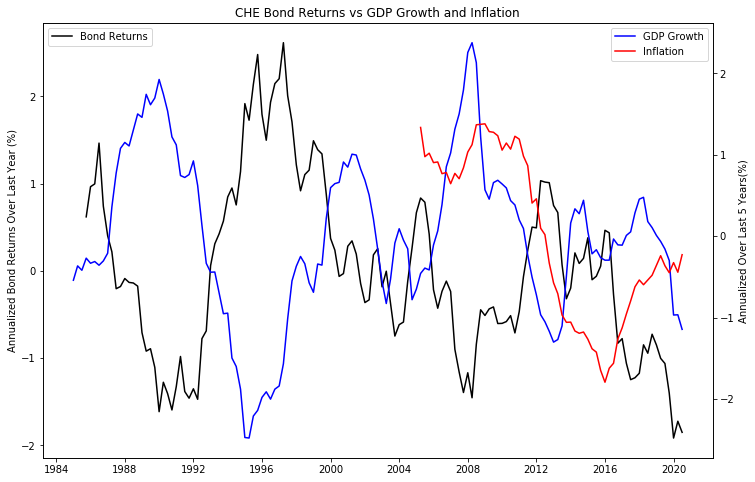

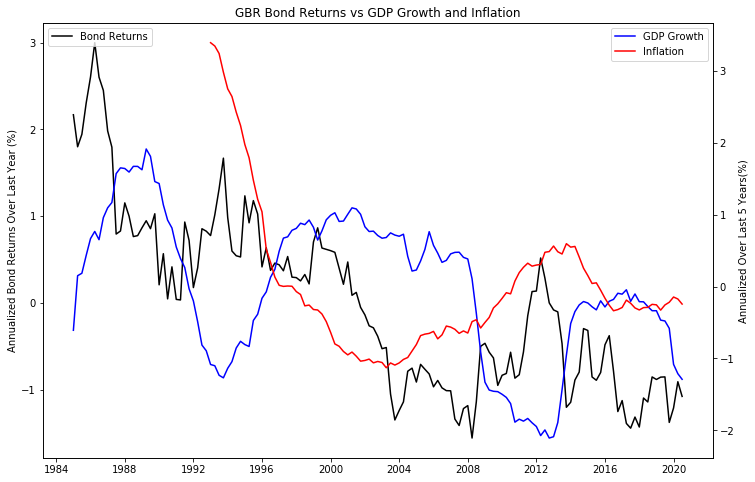

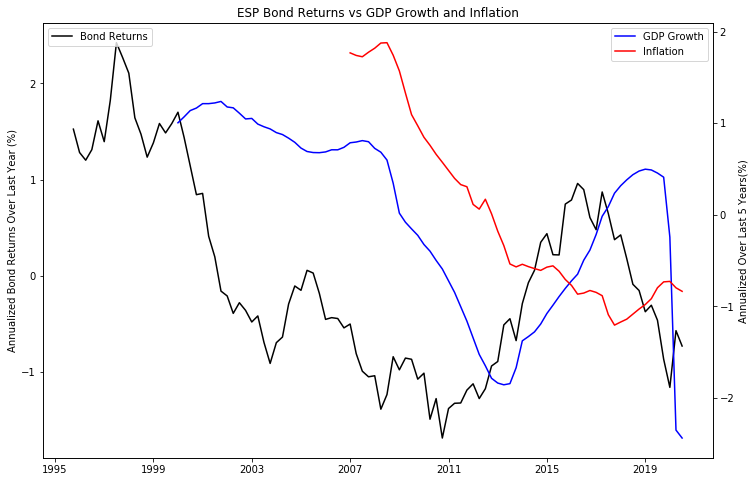

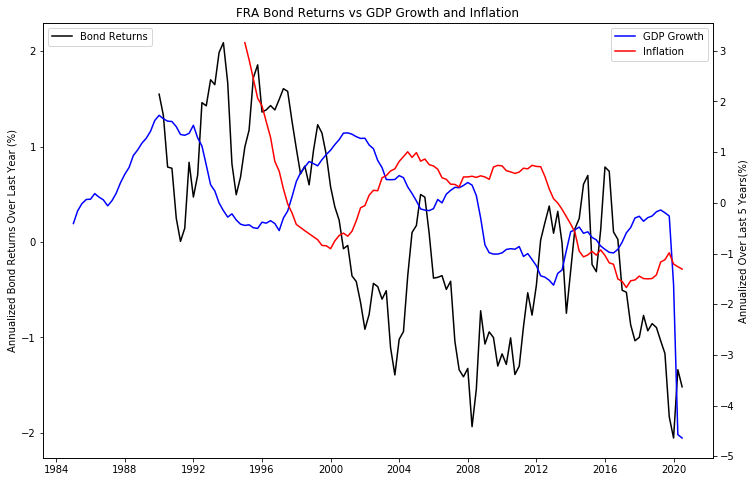

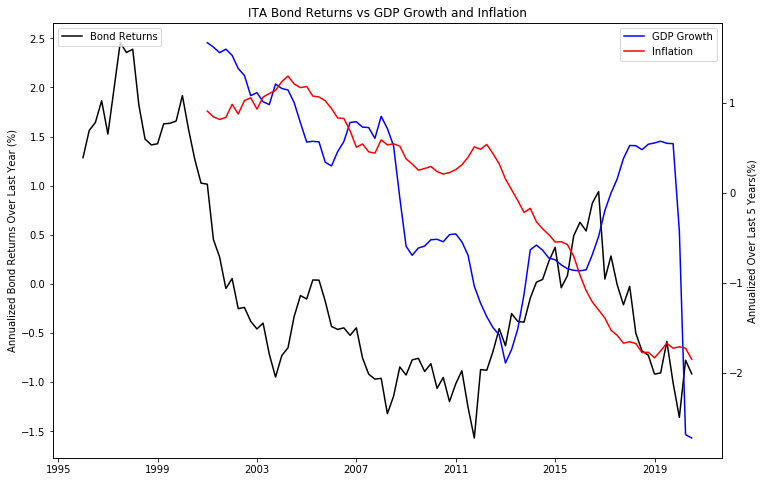

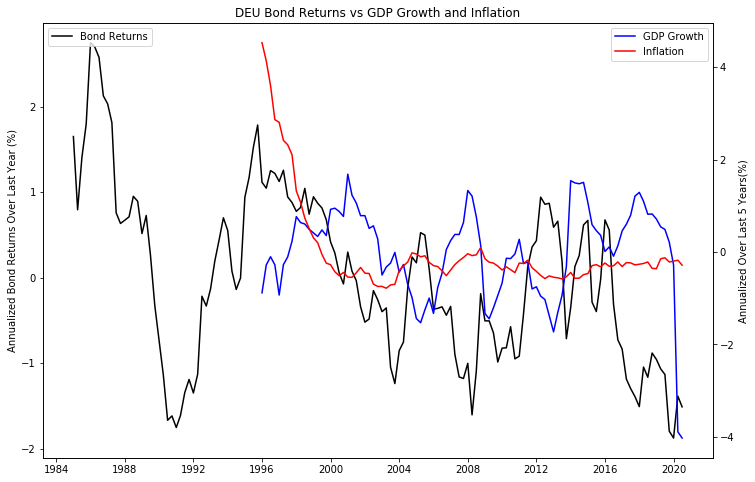

In [230]:
countries = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']

RealGDPQuarterly = dl.pull('GDP/Real').resample('1Q').last()
InflationQuarterly = dl.pull('CoreCPI/SA').resample('1Q').last()
BondReturnsQuarterly = dl.pull('BondRetIdx/LocalFX').resample('1Q').last()

RealGDPGrowth = RealGDPQuarterly.pct_change()
InflationGrowth = InflationQuarterly.pct_change()
BondReturnsGrowth = BondReturnsQuarterly.pct_change()

AnnualizedRealGDPGrowth = 100*RealGDPGrowth.rolling(20, min_periods=20).apply(lambda x: ((1+x).prod()**(1/5))-1, 
                                                                              raw=True)
AnnualizedInflationGrowth = 100*InflationGrowth.rolling(20, min_periods=20).apply(lambda x: ((1+x).prod()**(1/5))-1, 
                                                                              raw=True)
AnnualizedBondReturnsGrowth = 100*BondReturnsGrowth.rolling(20, min_periods=20).apply(lambda x: ((1+x).prod()**(1/5))-1, 
                                                                              raw=True)
for country in countries:
    
    fig, ax1 = plt.subplots(figsize=(12,8))
    ax2 = ax1.twinx()
    
    ax1.plot(standardize(AnnualizedBondReturnsGrowth[country]).to_timestamp(), color='black', label='Bond Returns')
    ax1.set_ylabel('Annualized Bond Returns Over Last Year (%)')
    ax1.legend(loc=2)
    
    ax2.plot(standardize(AnnualizedRealGDPGrowth[country]).to_timestamp(), color='blue', label='GDP Growth')
    ax2.plot(standardize(AnnualizedInflationGrowth[country]).to_timestamp(), color='red', label='Inflation')
    ax2.set_ylabel('Annualized Over Last 5 Years(%)')
    ax2.legend()
    
    plt.xlabel('Date')
    
    plt.title('{} Bond Returns vs GDP Growth and Inflation'.format(country))
    plt.show()

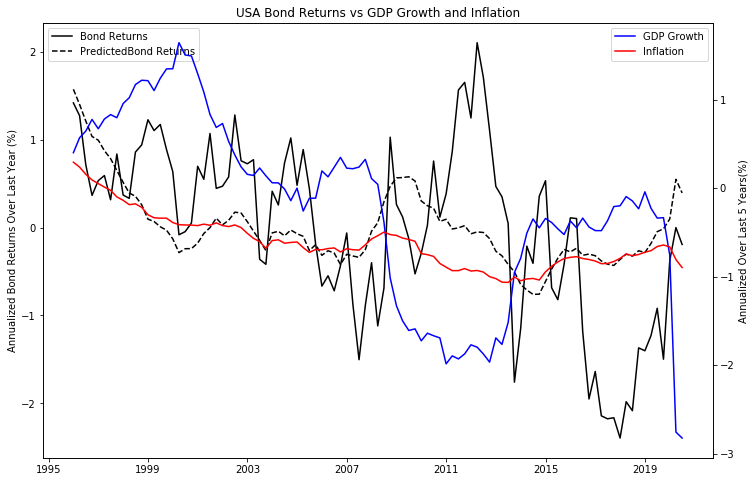

Score: 0.19148951520793311


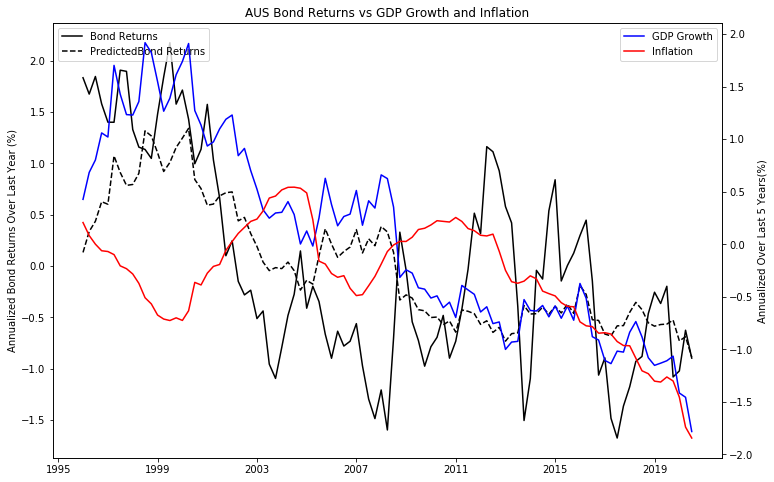

Score: 0.34847999936823604


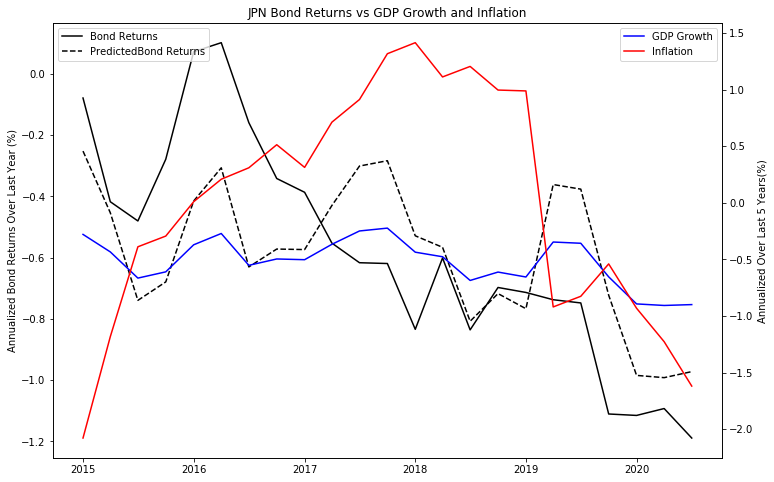

Score: 0.3906349905554589


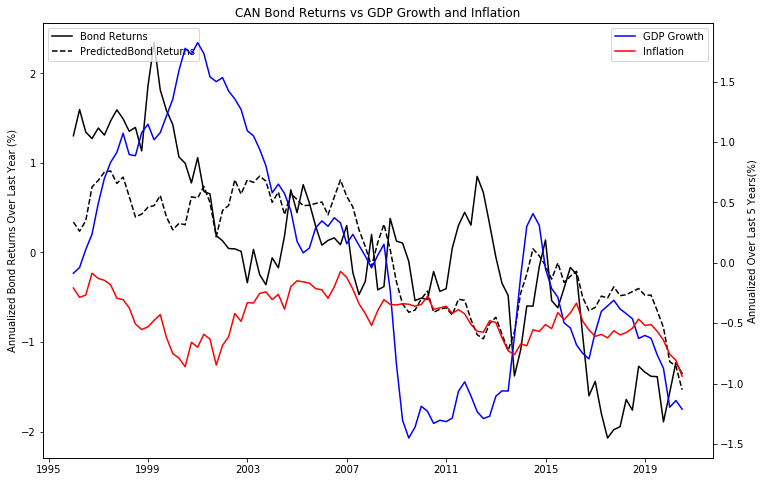

Score: 0.3815939617648383


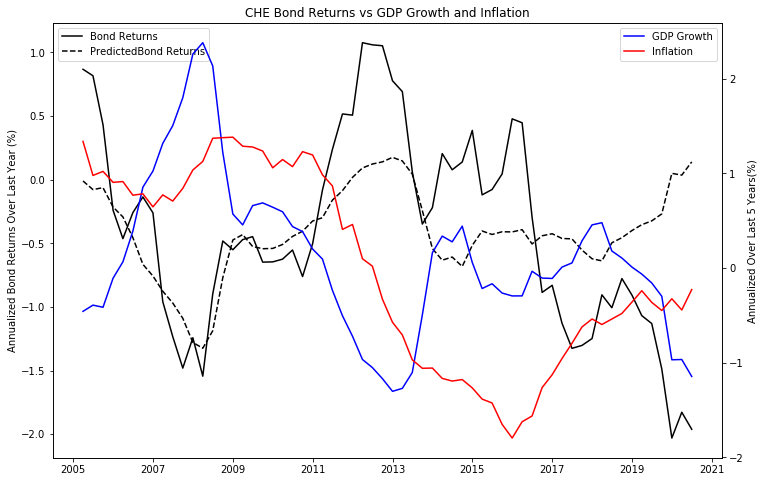

Score: 0.19319265488254167


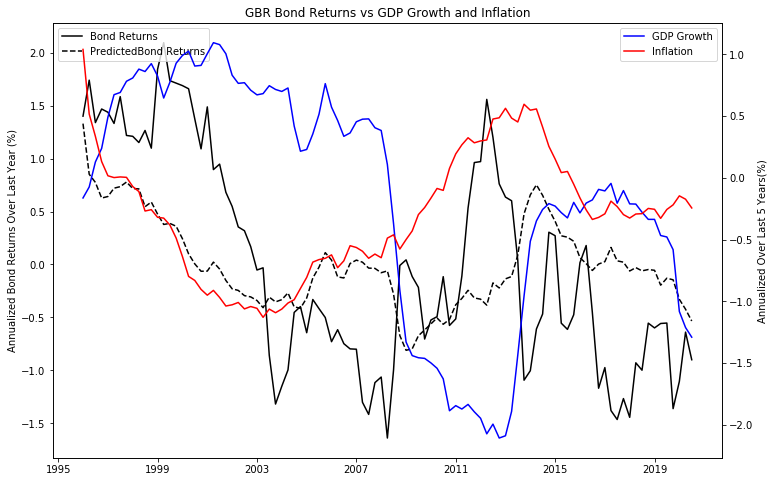

Score: 0.17217340120469338


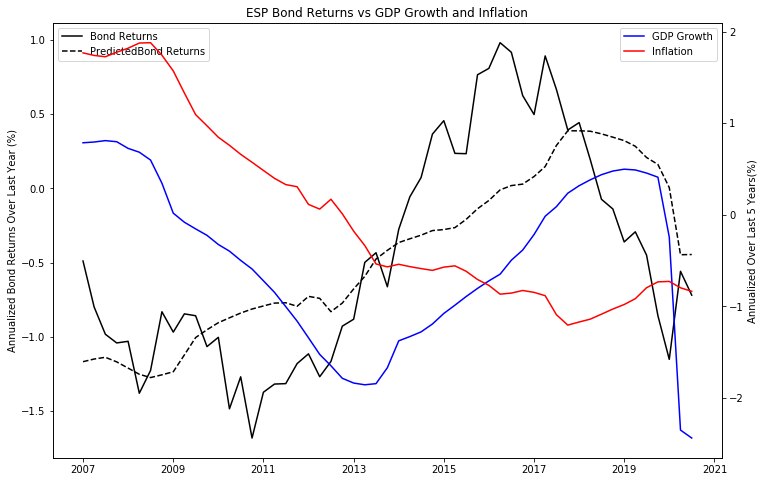

Score: 0.5166678548440068


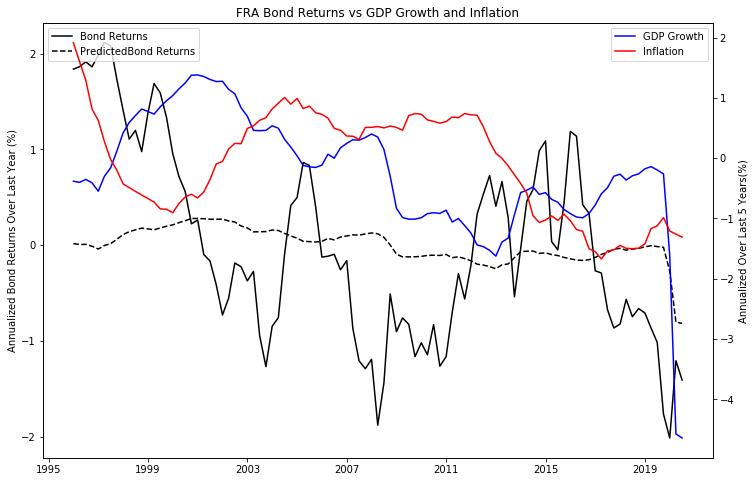

Score: 0.03367561883724257


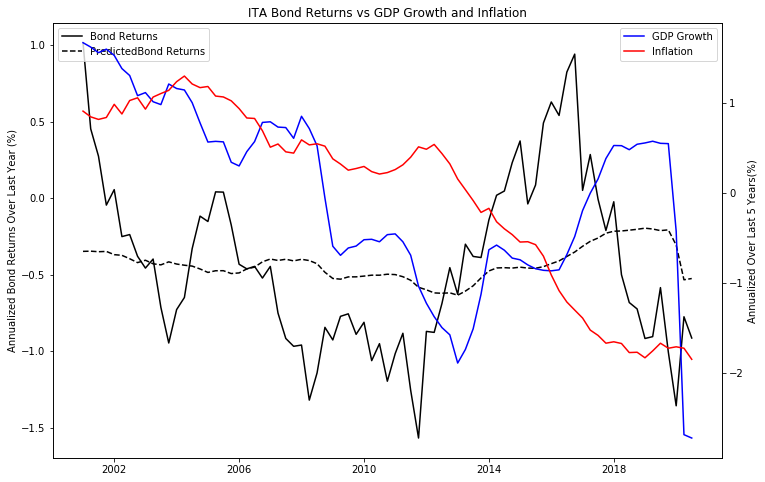

Score: 0.0392473629021286


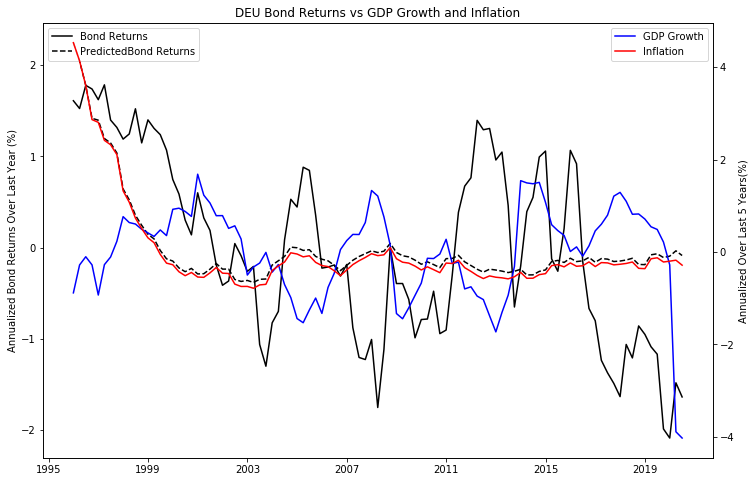

Score: 0.24419082479340537


In [242]:
from sklearn import linear_model

for country in countries:
    
    data = pd.DataFrame()
    data['Bond Returns'] = standardize(AnnualizedBondReturnsGrowth[country])
    data['GDP Growth'] = standardize(AnnualizedRealGDPGrowth[country])
    data['Inflation'] = standardize(AnnualizedInflationGrowth[country])
    data = data.dropna()
    
    X = data[['GDP Growth', 'Inflation']]
    y = data['Bond Returns']
    
    lm = linear_model.LinearRegression()
    model = lm.fit(X,y)
    
    data['Predicted Bond Returns'] = lm.predict(X)
    
    fig, ax1 = plt.subplots(figsize=(12,8))
    ax2 = ax1.twinx()
    
    ax1.plot(data['Bond Returns'].to_timestamp(), color='black', label='Bond Returns')
    ax1.plot(data['Predicted Bond Returns'].to_timestamp(), color='black', label='PredictedBond Returns', ls='--')
    ax1.set_ylabel('Annualized Bond Returns Over Last Year (%)')
    ax1.legend(loc=2)
    
    ax2.plot(data['GDP Growth'].to_timestamp(), color='blue', label='GDP Growth')
    ax2.plot(data['Inflation'].to_timestamp(), color='red', label='Inflation')
    ax2.set_ylabel('Annualized Over Last 5 Years(%)')
    ax2.legend()
    
    plt.xlabel('Date')
    
    plt.title('{} Bond Returns vs GDP Growth and Inflation'.format(country))
    plt.show()
    
    print("Score:", lm.score(X,y))

They seem to play a significant role, but are not the sole determinants.

## Question 8

In [ ]:
#countries = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']
countries = ['USA']

ShortRates = dl.pull('ShortRates').resample('1Q').last()
LongRates = dl.pull('LongRates').resample('1Q').last()
BondReturnsQuarterly = dl.pull('BondRetIdx/LocalFX').resample('1Q').last()

YieldCurve = LongRates-ShortRates
CurveHeight = (LongRates = ShorRates)/2

BondReturnsGrowth = BondReturnsQuarterly.pct_change()

AnnualizedBondReturnsGrowth = 100*BondReturnsGrowth.rolling(12, min_periods=12).apply(lambda x: ((1+x).prod()**(1/3))-1, 
                                                                              raw=True)
for country in countries:
    
    plt.plot
    
    fig, ax1 = plt.subplots(figsize=(12,8))
    ax2 = ax1.twinx()
    
    ax1.plot(AnnualizedBondReturnsGrowth[country].to_timestamp(), color='black', label='Bond Returns')
    ax1.set_ylabel('Annualized Bond Returns Over Last Year (%)')
    ax1.legend(loc=2)
    
    ax2.plot(AnnualizedRealGDPGrowth[country].to_timestamp(), color='blue', label='GDP Growth')
    ax2.plot(AnnualizedInflationGrowth[country].to_timestamp(), color='red', label='Inflation')
    ax2.set_ylabel('Annualized Over Last 5 Years(%)')
    ax2.legend()
    
    plt.xlabel('Date')
    
    plt.title('{} Bond Returns vs GDP Growth and Inflation'.format(country))
    plt.show()